In [1]:
import pandas as pd
import numpy as np
import requests
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [2]:
# Read in kindergarten vaccination data

vac = pd.read_csv("data/2000-2015 CAKindergartenData.csv")

C:\Users\qcsbo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create new dataframe with columns needed to calculate Pertussis vaccination rate for each county by year

dtp_df = vac[['Year', 'COUNTY', 'ENROLLMENT', 'DTP#']]
dtp_df = dtp_df[dtp_df['Year'] != 2000]
dtp_df.head()

,Year,COUNTY,ENROLLMENT,DTP#
7418,2001,ALAMEDA,12,12
7419,2001,ALAMEDA,78,77
7420,2001,ALAMEDA,77,76
7421,2001,ALAMEDA,56,54
7422,2001,ALAMEDA,41,41


In [4]:
# Remove rows with missing data

dtp_df = dtp_df[dtp_df["ENROLLMENT"] != " "]

# Convert string columns to numeric

dtp_df["ENROLLMENT"] = pd.to_numeric(dtp_df["ENROLLMENT"])
dtp_df['DTP#'] = pd.to_numeric(dtp_df['DTP#'])


In [5]:
# Sum up enrollement and vaccination numbers by year and county

dtp_summed_df = dtp_df.groupby(['Year','COUNTY']).sum()
dtp_summed_df['cnty_vac_rate'] = 0

# Calculate vaccination rate for each county

dtp_summed_df['cnty_vac_rate'] = dtp_summed_df['DTP#']/dtp_summed_df['ENROLLMENT'] * 100

dtp_summed_df.head()

ENROLLMENT     DTP#  cnty_vac_rate
Year COUNTY                                       
2001 ALAMEDA       19392.0  18332.0      94.533828
     AMADOR          345.0    336.0      97.391304
     BUTTE          2508.0   2358.0      94.019139
     CALAVERAS       399.0    373.0      93.483709
     COLUSA          322.0    315.0      97.826087

In [6]:
pop_df = pd.read_csv("data/CA County Population Over Time All.csv", header=None)
pop_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,table with row headers in column A and column ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,NaN,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,California,"33,871,653","33,987,977","34,479,458","34,871,843","35,253,159","35,574,576","35,827,943","36,021,202","36,250,311",...,"36,961,229","37,254,518","37,327,690","37,672,654","38,019,006","38,347,383","38,701,278","39,032,444","39,296,476","39,459,622"
3,.Alameda County,"1,443,705","1,449,840","1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715",...,"1,498,539","1,510,261","1,513,402","1,532,215","1,556,648","1,582,936","1,611,572","1,637,141","1,653,236","1,663,190"
4,.Alpine County,"1,206","1,209","1,196","1,237","1,233","1,263","1,219","1,276","1,274",...,"1,197","1,175","1,161","1,093","1,110","1,127","1,084","1,088","1,057","1,120"


In [7]:
# Remove first row

pop_df = pop_df[1:]
pop_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,Geographic Area,NaN,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,California,"33,871,653","33,987,977","34,479,458","34,871,843","35,253,159","35,574,576","35,827,943","36,021,202","36,250,311",...,"36,961,229","37,254,518","37,327,690","37,672,654","38,019,006","38,347,383","38,701,278","39,032,444","39,296,476","39,459,622"
3,.Alameda County,"1,443,705","1,449,840","1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715",...,"1,498,539","1,510,261","1,513,402","1,532,215","1,556,648","1,582,936","1,611,572","1,637,141","1,653,236","1,663,190"
4,.Alpine County,"1,206","1,209","1,196","1,237","1,233","1,263","1,219","1,276","1,274",...,"1,197","1,175","1,161","1,093","1,110","1,127","1,084","1,088","1,057","1,120"
5,.Amador County,"35,101","35,153","35,697","36,561","36,994","37,400","38,040","38,353","38,756",...,"38,238","38,091","37,884","37,539","37,112","36,635","36,748","37,047","37,473","38,626"


In [8]:
# Rename what will be the column names

pop_df.loc[0:1, 0] = "COUNTY"
pop_df.loc[0:1, 1] = '1999'

# Make first row column names and remove it and the next row of total state population from the data

pop_df.columns = pop_df.iloc[0]
pop_df = pop_df[2:]

# Drop years not needed

pop_df.drop(["1999", "2000", "2016", "2017", "2018"], axis=1, inplace=True )

In [9]:
# Make changes to the county column content to match county column of dtp_df dataframe so they can be merged

pop_df["COUNTY"] = pop_df["COUNTY"].str.split(' County', expand=True)
pop_df["COUNTY"] = pop_df["COUNTY"].str.split('.', expand=True)[1]
pop_df['COUNTY'] = pop_df['COUNTY'].str.upper()

pop_df.head()

1,COUNTY,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3,ALAMEDA,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539","1,510,261","1,513,402","1,532,215","1,556,648","1,582,936","1,611,572"
4,ALPINE,"1,196","1,237","1,233","1,263","1,219","1,276","1,274","1,202","1,197","1,175","1,161","1,093","1,110","1,127","1,084"
5,AMADOR,"35,697","36,561","36,994","37,400","38,040","38,353","38,756","38,248","38,238","38,091","37,884","37,539","37,112","36,635","36,748"
6,BUTTE,"206,193","209,120","211,481","213,065","214,752","216,824","217,469","219,034","219,777","220,002","219,957","220,003","220,969","221,768","223,629"
7,CALAVERAS,"41,304","42,380","43,755","44,530","45,295","46,045","46,268","46,265","45,900","45,578","45,470","45,163","44,826","44,667","44,677"


In [10]:
# Reshape population dataframe from wide to long

long_pop_df = pd.melt(pop_df, id_vars=['COUNTY'], value_name = 'population')

# Convert year column to integer type to match type of dtp_df year column type

long_pop_df[1] = long_pop_df[1].astype('int64')

In [11]:
# Create multilevel index to match index of dtp_df data frame

long_pop_df.set_index([1, 'COUNTY'], inplace=True)

In [12]:
# Merge population and
vac_pop_df = pd.merge(dtp_summed_df, long_pop_df,  how='left', left_on=['Year','COUNTY'], right_on = [1,'COUNTY'])

vac_pop_df.head()

ENROLLMENT     DTP#  cnty_vac_rate population
Year COUNTY                                                  
2001 ALAMEDA       19392.0  18332.0      94.533828  1,469,484
     AMADOR          345.0    336.0      97.391304     35,697
     BUTTE          2508.0   2358.0      94.019139    206,193
     CALAVERAS       399.0    373.0      93.483709     41,304
     COLUSA          322.0    315.0      97.826087     19,022

In [13]:
# Covert population column type to numneric

vac_pop_df['population'] = vac_pop_df['population'].str.replace(',', '')
vac_pop_df['population'] = vac_pop_df['population'].astype(float)

vac_pop_df.head()

ENROLLMENT     DTP#  cnty_vac_rate  population
Year COUNTY                                                   
2001 ALAMEDA       19392.0  18332.0      94.533828   1469484.0
     AMADOR          345.0    336.0      97.391304     35697.0
     BUTTE          2508.0   2358.0      94.019139    206193.0
     CALAVERAS       399.0    373.0      93.483709     41304.0
     COLUSA          322.0    315.0      97.826087     19022.0

In [17]:
# URL for CA disease incident data

url="https://data.chhs.ca.gov/api/3/action/datastore_search?resource_id=a7a4d868-f6d2-49c9-8a11-904c69a0e3a0&limit=8000"

# Get json with disease incident data and covert to dataframe

response = requests.get(url)
response_json = response.json()

# records = response_json['result']['records']

outbreak_df = pd.DataFrame(response_json['result']['records'])

# Filter for Pertussin incident data and drop years not needed

outbreak_df = outbreak_df[outbreak_df['disease'] == 'Pertussis'][['count', 'county', 'year']]
outbreak_df = outbreak_df[(outbreak_df['year'] != '2016') & (outbreak_df['year'] != '2017')]
outbreak_df.head()

,count,county,year
4720,20,Alameda,2001
4721,45,Alameda,2002
4722,44,Alameda,2003
4723,84,Alameda,2004
4724,122,Alameda,2005


In [18]:
# Convert year column data type to match vac_pop_df year column data type

outbreak_df['year'] = outbreak_df['year'].astype('int64')

# Convert county column string case to match vac_pop_df county column case

outbreak_df['county'] = outbreak_df['county'].str.upper()

# Create multilevel index to match vac_pop_df index

outbreak_df.set_index(['year', 'county'], inplace=True)

# Merge outbreak df with vaccination/population data frame

combined_df = vac_pop_df.merge(outbreak_df, left_on=['Year', 'COUNTY'], right_index=True)
combined_df['outbreak%'] = combined_df['count']/combined_df['population'] *10000


In [19]:
#Load US census files and create dataframe to merge with the combined_df

pop_metrics_df = pd.DataFrame()

for year in range(2010,2017):
    file_path = "data/" + str(year) + "_final.csv"
    temp = pd.read_csv(file_path)
    
    del temp['county']
    del temp['Total Pop']

    temp = temp.rename(columns={'NAME': 'COUNTY'})
    temp["COUNTY"] = temp["COUNTY"].str.split(' County', expand=True)
    temp['COUNTY'] = temp['COUNTY'].str.upper()

    temp['Year'] = year

    temp.set_index(['Year', 'COUNTY'], inplace=True)
    pop_metrics_df = pop_metrics_df.append(temp)

    
combined_df = combined_df.merge(pop_metrics_df, left_on=['Year', 'COUNTY'], right_index=True)

combined_df.head()



ENROLLMENT     DTP#  cnty_vac_rate  population  count  \
Year COUNTY                                                             
2010 ALAMEDA       17721.0  16559.0      93.442808   1510261.0    436   
     AMADOR          311.0    298.0      95.819936     38091.0      4   
     BUTTE          2497.0   2252.0      90.188226    220002.0     32   
     CALAVERAS       394.0    311.0      78.934010     45578.0      9   
     COLUSA          369.0    360.0      97.560976     21419.0     11   

                outbreak%  % Foreign Born  % Overseas Move Past Year  \
Year COUNTY                                                            
2010 ALAMEDA     2.886918       30.814964                   1.072207   
     AMADOR      1.050117        6.076656                   0.140893   
     BUTTE       1.454532        7.910902                   0.408443   
     CALAVERAS   1.974637        4.050528                   0.115232   
     COLUSA      5.135627       25.282306                   1.771793   

                Birthrate Past Year  % School Aged  Ave HH Size  \
Year COUNTY                                                       
2010 ALAMEDA               4.862443      19.054047     2.346766   
     AMADOR                4.318426      15.860881     2.282057   
     BUTTE                 5.478140      18.238617     2.169502   
     CALAVERAS             3.784703      17.589251     2.377663   
     COLUSA                5.735560      25.405150     2.771886   

                % Not Enrolled  % School-Aged Below Poverty Line  
Year COUNTY                                                       
2010 ALAMEDA          7.877776                         14.427957  
     AMADOR           6.876131                          7.459045  
     BUTTE            7.939613                         21.958076  
     CALAVERAS       12.447466                          9.973273  
     COLUSA           8.778129                         23.157686

In [20]:
# Set the incident count for the outbreak threshold
outbreak_threshold = 20

# Mark each row as either an outbreak year or not by comparing to the outbreak threshold
combined_df['outbreak_year'] = np.where(combined_df['count'] >= outbreak_threshold, 1, 0)


# Drop all rows with Alpine county since it has missing data for a number of years
combined_df = combined_df[~combined_df.index.get_level_values("COUNTY").str.contains("ALPINE")]

# Creat lists of index values to use in looping through the dataset
year_range = combined_df.index.levels[0].tolist()
county_range = combined_df.index.levels[1].tolist()

# Remove 'Alpine' from the index
county_range.remove("ALPINE")

combined_df['years_since_outbreak'] = 0

# Iterate through the data set and calculate the number of years since the last outbreak
for county in county_range:
    for year in year_range:
        year_count = 0
        
        for years in range(year, 2010, -1):
            if combined_df.loc[years, county].outbreak_year == 0: 
                year_count += 1
            else:
                break
            
        combined_df.loc[(year, county), 'years_since_outbreak'] = year_count
        
        
combined_df.to_csv('complete_dataset.csv')

combined_df.drop(['ENROLLMENT', 'DTP#', 'population', 'count', 'outbreak_year'],  axis=1, inplace = True)


combined_df.corr()

,cnty_vac_rate,outbreak%,% Foreign Born,% Overseas Move Past Year,Birthrate Past Year,% School Aged,Ave HH Size,% Not Enrolled,% School-Aged Below Poverty Line,years_since_outbreak
cnty_vac_rate,1.000000,-0.051445,0.553662,0.253562,0.254067,0.571232,0.276395,0.281826,0.177075,-0.109095
outbreak%,-0.051445,1.000000,0.012211,0.063931,-0.133938,-0.069933,-0.106027,-0.163109,-0.192547,-0.282229
% Foreign Born,0.553662,0.012211,1.000000,0.702998,0.167445,0.432593,0.152631,-0.132532,-0.085158,-0.385584
% Overseas Move Past Year,0.253562,0.063931,0.702998,1.000000,-0.016592,0.101728,-0.043941,-0.263234,-0.251687,-0.360320
Birthrate Past Year,0.254067,-0.133938,0.167445,-0.016592,1.000000,0.508479,0.213672,0.030050,0.454856,0.027217
% School Aged,0.571232,-0.069933,0.432593,0.101728,0.508479,1.000000,0.326961,0.198092,0.395407,-0.176792
Ave HH Size,0.276395,-0.106027,0.152631,-0.043941,0.213672,0.326961,1.000000,0.055485,0.157720,0.046408
% Not Enrolled,0.281826,-0.163109,-0.132532,-0.263234,0.030050,0.198092,0.055485,1.000000,0.461318,0.173881
% School-Aged Below Poverty Line,0.177075,-0.192547,-0.085158,-0.251687,0.454856,0.395407,0.157720,0.461318,1.000000,0.231247
years_since_outbreak,-0.109095,-0.282229,-0.385584,-0.360320,0.027217,-0.176792,0.046408,0.173881,0.231247,1.000000


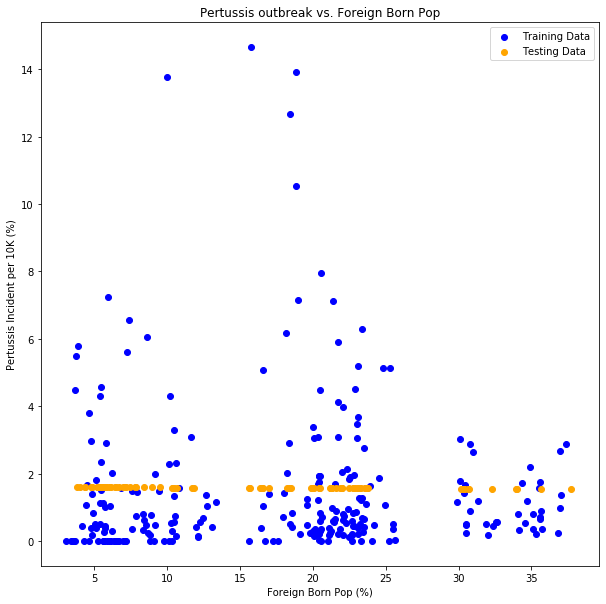

In [63]:
# Do linear regression and plot

X = combined_df[['% Foreign Born']]
y = combined_df['outbreak%'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

plt.scatter(X_train, y_train, c="blue", label="Training Data")
plt.scatter(X_test, predictions, c="orange", label="Testing Data")
plt.legend()
plt.title("Pertussis outbreak vs. Foreign Born Pop")
plt.xlabel ('Foreign Born Pop (%)')
plt.ylabel ('Pertussis Incident per 10K (%)')
plt.rcParams['figure.figsize'] = (10,10)

plt.savefig('images/foreign_linear.png', bbox_inches='tight')
plt.show()

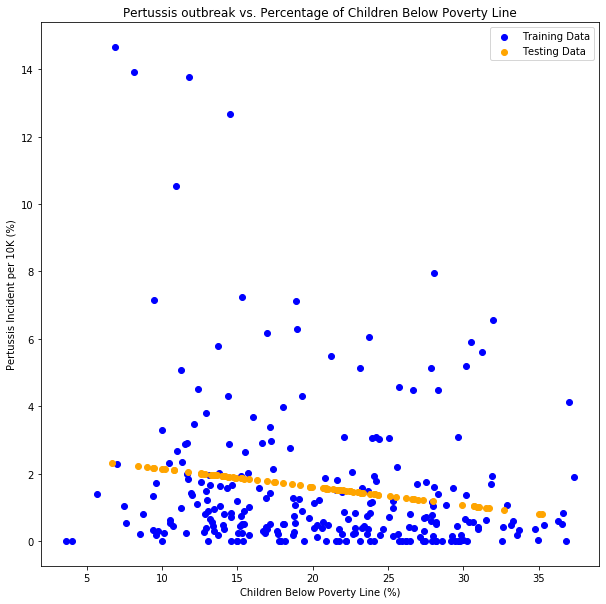

In [72]:
# Do linear regression and plot

X = combined_df[['% School-Aged Below Poverty Line']]
y = combined_df['outbreak%'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

plt.scatter(X_train, y_train, c="blue", label="Training Data")
plt.scatter(X_test, predictions, c="orange", label="Testing Data")
plt.legend()
plt.title("Pertussis outbreak vs. Percentage of Children Below Poverty Line")
plt.xlabel ('Children Below Poverty Line (%)')
plt.ylabel ('Pertussis Incident per 10K (%)')
plt.rcParams['figure.figsize'] = (10,10)

plt.savefig('images/poverty_linear.png', bbox_inches='tight')
plt.show()

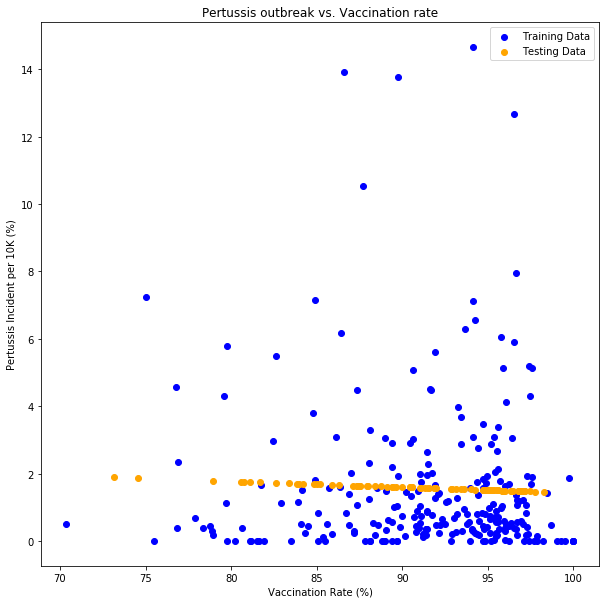

In [65]:
# Do linear regression and plot for vaccination rate

X = combined_df[['cnty_vac_rate']]
y = combined_df['outbreak%'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

plt.scatter(X_train, y_train, c="blue", label="Training Data")
plt.scatter(X_test, predictions, c="orange", label="Testing Data")
plt.legend()
plt.title("Pertussis outbreak vs. Vaccination rate")
plt.xlabel ('Vaccination Rate (%)')
plt.ylabel ('Pertussis Incident per 10K (%)')
plt.rcParams['figure.figsize'] = (10,10)
plt.savefig('images/vac_rate_linear.png', bbox_inches='tight')
plt.show()


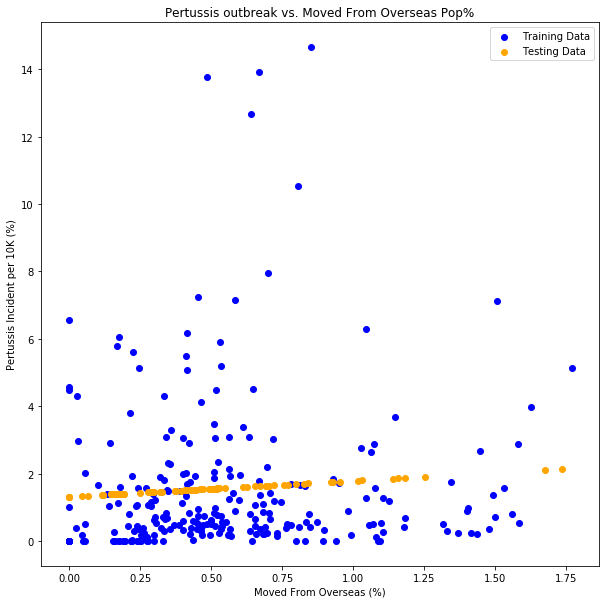

In [66]:
# Do linear regression and plot with percentage of county population that moved from overseas in the last year

X = combined_df[['% Overseas Move Past Year']]
y = combined_df['outbreak%'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

plt.scatter(X_train, y_train, c="blue", label="Training Data")
plt.scatter(X_test, predictions, c="orange", label="Testing Data")
plt.legend()
plt.title("Pertussis outbreak vs. Moved From Overseas Pop%")
plt.xlabel ('Moved From Overseas (%)')
plt.ylabel ('Pertussis Incident per 10K (%)')
plt.rcParams['figure.figsize'] = (10,10)
plt.savefig('images/overseas_move_linear.png', bbox_inches='tight')
plt.show()


In [31]:
# Check linear regression metrics

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 5.05182240283841, R2: -0.013805715185096545


In [32]:
# Prep for logistic regression

# Create class and set threshold for determining an outbreak
combined_df['outbreak_y_n'] = combined_df['outbreak%'].apply(lambda x: 1 if x > 10 else 0)

# Encode the class for outbreaks
le = LabelEncoder()
combined_df['class'] = le.fit_transform(combined_df['outbreak_y_n'])
# combined_df['class'] = le.fit_transform(combined_df['outbreak_year'])

C:\Users\qcsbo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qcsbo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9767441860465116


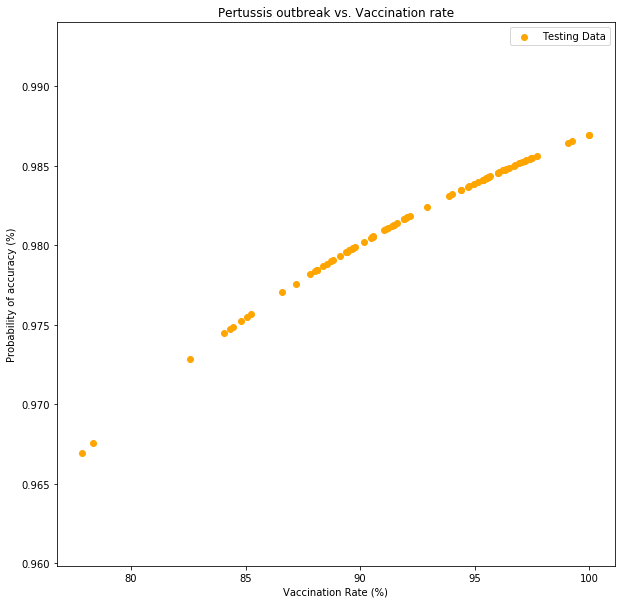

In [67]:
# Set data for logistic analysis of county vaccination rate
W = combined_df[['cnty_vac_rate']]

z = combined_df['class'].values.reshape(-1, 1)

# Do logistic regression and check accuracy

logreg = LogisticRegression()
W_train, W_test, z_train, z_test = train_test_split(W, z, random_state=123)
logreg.fit(W_train, z_train)
z_pred = logreg.predict(W_test)

print (accuracy_score(z_test, z_pred))


# Plot logistic regression

plt.scatter(W_test, logreg.predict_proba(W_test)[:,0] , c="orange", label="Testing Data")
plt.legend()
plt.title("Pertussis outbreak vs. Vaccination rate")
plt.xlabel ('Vaccination Rate (%)')
plt.ylabel ('Probability of accuracy (%)')
plt.rcParams['figure.figsize'] = (10,10)
plt.savefig('images/vac_rate_log.png', bbox_inches='tight')
plt.show()


C:\Users\qcsbo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qcsbo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9767441860465116


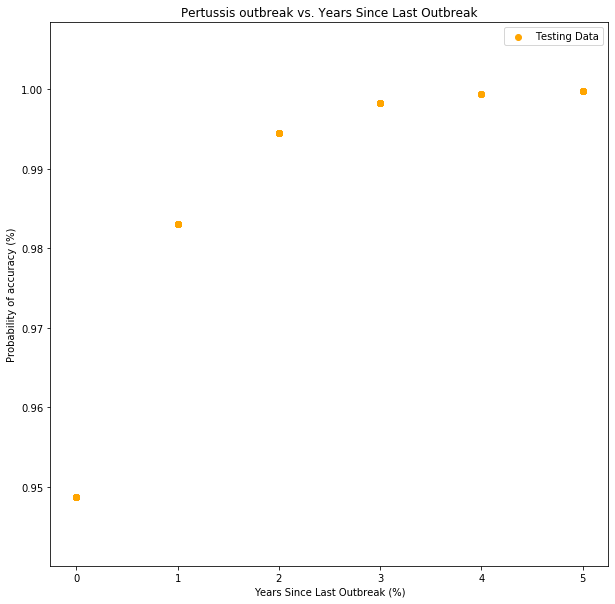

In [68]:
# Set data for logistic analysis of number of years since last outbreak
W = combined_df[['years_since_outbreak']]

z = combined_df['class'].values.reshape(-1, 1)

# Do logistic regression and check accuracy

logreg = LogisticRegression()
W_train, W_test, z_train, z_test = train_test_split(W, z, random_state=123)
logreg.fit(W_train, z_train)
z_pred = logreg.predict(W_test)

print (accuracy_score(z_test, z_pred))


# Plot logistic regression

plt.scatter(W_test, logreg.predict_proba(W_test)[:,0] , c="orange", label="Testing Data")
plt.legend()
plt.title("Pertussis outbreak vs. Years Since Last Outbreak")
plt.xlabel ('Years Since Last Outbreak (%)')
plt.ylabel ('Probability of accuracy (%)')
plt.rcParams['figure.figsize'] = (10,10)
plt.savefig('images/years_since_outbreak_log.png', bbox_inches='tight')
plt.show()


C:\Users\qcsbo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qcsbo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9767441860465116


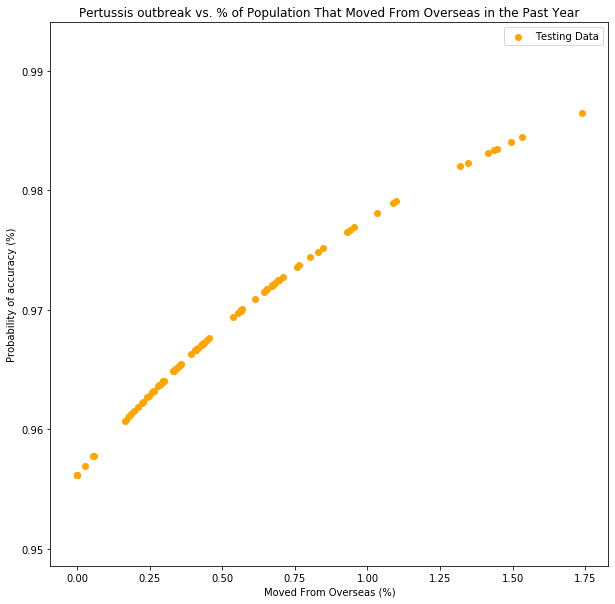

In [69]:
# Set data for logistic analysis of % of population that moved from overseas in the last year

W = combined_df[['% Overseas Move Past Year']]

z = combined_df['class'].values.reshape(-1, 1)

# Do logistic regression and check accuracy

logreg = LogisticRegression()
W_train, W_test, z_train, z_test = train_test_split(W, z, random_state=123)
logreg.fit(W_train, z_train)
z_pred = logreg.predict(W_test)

print (accuracy_score(z_test, z_pred))


# Plot logistic regression

plt.scatter(W_test, logreg.predict_proba(W_test)[:,0] , c="orange", label="Testing Data")
plt.legend()
plt.title("Pertussis outbreak vs. % of Population That Moved From Overseas in the Past Year")
plt.xlabel ('Moved From Overseas (%)')
plt.ylabel ('Probability of accuracy (%)')
plt.rcParams['figure.figsize'] = (10,10)
plt.savefig('images/overseas_move_log.png', bbox_inches='tight')
plt.show()


C:\Users\qcsbo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qcsbo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9767441860465116


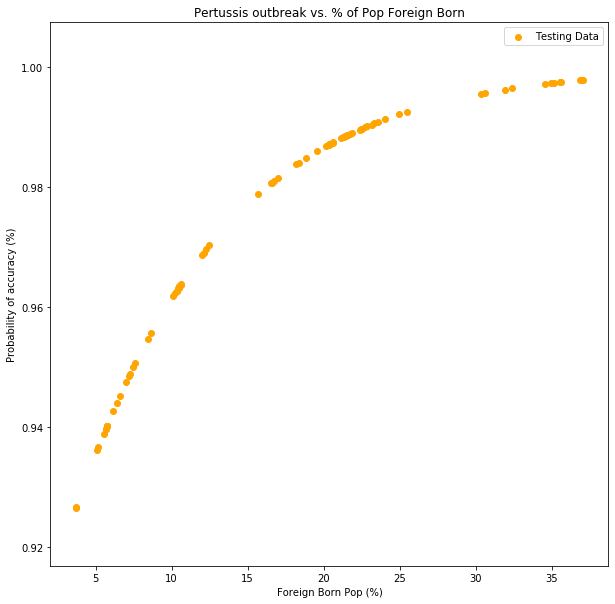

In [70]:
# Set data for logistic analysis of % of poplulation born overseas

W = combined_df[['% Foreign Born']]

z = combined_df['class'].values.reshape(-1, 1)

# Do logistic regression and check accuracy

logreg = LogisticRegression()
W_train, W_test, z_train, z_test = train_test_split(W, z, random_state=123)
logreg.fit(W_train, z_train)
z_pred = logreg.predict(W_test)

print (accuracy_score(z_test, z_pred))


# Plot logistic regression

plt.scatter(W_test, logreg.predict_proba(W_test)[:,0] , c="orange", label="Testing Data")
plt.legend()
plt.title("Pertussis outbreak vs. % of Pop Foreign Born")
plt.xlabel ('Foreign Born Pop (%)')
plt.ylabel ('Probability of accuracy (%)')
plt.rcParams['figure.figsize'] = (10,10)
plt.savefig('images/foreign_born_log.png', bbox_inches='tight')
plt.show()


C:\Users\qcsbo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qcsbo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9767441860465116


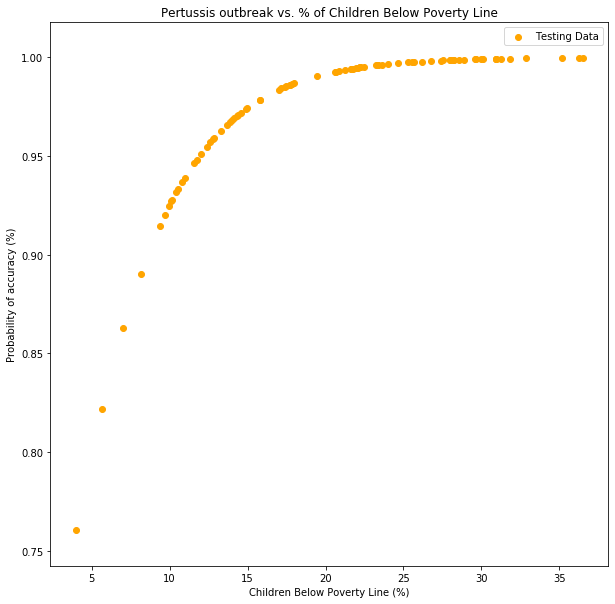

In [71]:
# Set data for logistic analysis of % of poplulation born overseas

W = combined_df[['% School-Aged Below Poverty Line']]

z = combined_df['class'].values.reshape(-1, 1)

# Do logistic regression and check accuracy

logreg = LogisticRegression()
W_train, W_test, z_train, z_test = train_test_split(W, z, random_state=123)
logreg.fit(W_train, z_train)
z_pred = logreg.predict(W_test)

print (accuracy_score(z_test, z_pred))


# Plot logistic regression

plt.scatter(W_test, logreg.predict_proba(W_test)[:,0] , c="orange", label="Testing Data")
plt.legend()
plt.title("Pertussis outbreak vs. % of Children Below Poverty Line")
plt.xlabel ('Children Below Poverty Line (%)')
plt.ylabel ('Probability of accuracy (%)')
plt.rcParams['figure.figsize'] = (10,10)
plt.savefig('images/%below_poverty_log.png', bbox_inches='tight')
plt.show()
